In [1]:
### Practice Notebook for Simple Linear Regression ###

## Import Packages ##
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

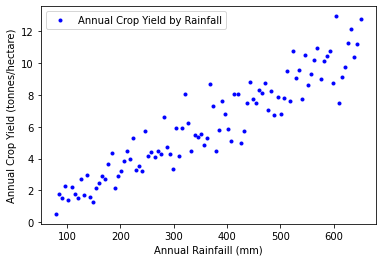

In [4]:
data = np.loadtxt('crop_yield.txt')

data = data.transpose()
rainfall = data[0]
crop_yield = data[1]

plt.plot(rainfall, crop_yield, 'b.', label='Annual Crop Yield by Rainfall')
plt.xlabel('Annual Rainfaill (mm)')
plt.ylabel('Annual Crop Yield (tonnes/hectare)')
plt.legend()

plt.show()

In [21]:
### Part 1 ### 
### TODO: Create a function that returns a design matrix of degree d from data x
def phiMat(d, x):
    phi = np.zeros((len(x), d))
    
    for i in range (0, len(x)): 
        phi[i][0] = 1
        phi[i][1] = x[i]
    
    return phi

def fit_polynomial(data_x, data_y, degree):
    Phi = phiMat(degree, data_x)
    A = Phi.T@Phi
    B = Phi.T@data_y
    
    return np.linalg.solve(A,B)

# Fit with degree 1 model
#design_matrix = phiMat(2, rainfall)
fitted = fit_polynomial(rainfall, crop_yield, 2)

print(fitted)

[-0.08891364  0.01706626]


SKLearn Model
Intercept: -0.28209272648248973
Coef: [0.0177634]

Created Model
[-0.08891364  0.01706626]


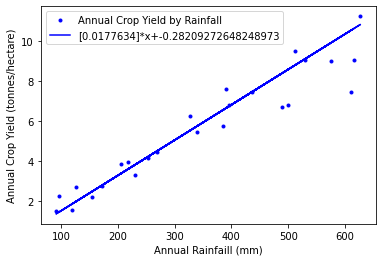

In [30]:
### Part 2: Verify the model using sklearn linear regression ###

# reshape the data to fit the shape accepted by sklearn
X = rainfall.reshape(len(rainfall),1)

# split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, crop_yield, test_size = 0.25, random_state=0)

sk_reg = LinearRegression().fit(X_train, y_train)
print("SKLearn Model\nIntercept: {}\nCoef: {}".format(sk_reg.intercept_, sk_reg.coef_))
print("\nCreated Model\n{}".format(fitted))


### Plot the observed data as points, 
#         the sklearn model as a line, 
#         and the model's prediction of the test data as points

plt.plot(X_test, y_test, 'b.', label='Annual Crop Yield by Rainfall')
x = X_test
y = ((sk_reg.coef_*x) + sk_reg.intercept_)
plt.plot(x, y, 'b', label='{}*x+{}'.format(sk_reg.coef_, sk_reg.intercept_))
plt.xlabel('Annual Rainfaill (mm)')
plt.ylabel('Annual Crop Yield (tonnes/hectare)')
plt.legend()

plt.show()